In [200]:
import os
from load_bacco_data import load_bacco_mahs
from astropy.table import Table

drn = "/Users/aphearin/work/DATA/BACCO"

bn = "nenya_sigma8_0.730_ScaledFrom_nenya_mah.h5"
bn = "nenya_sigma8_0.770_ScaledFrom_power_mah.h5"
bn = "nenya_sigma8_0.815_ScaledFrom_nenya_mah.h5"
bn = "nenya_sigma8_0.860_ScaledFrom_nenya_mah.h5"
mah_data = load_bacco_mahs(os.path.join(drn, bn))
halo_ids, log_mahs, tarr, lgm_min = mah_data

bn_fits = bn.replace(".h5", ".fits.h5")
fit_data = dd.io.load(os.path.join(drn, bn_fits))

In [201]:
from diffmah.individual_halo_assembly import DEFAULT_MAH_PARAMS
FIXED_K = DEFAULT_MAH_PARAMS["mah_k"]
logt0 = np.log10(tarr[-1])

DIFFMAH_FIT_KEYS = ['logmp_fit', 'mah_logtc', 'early_index', 'late_index']

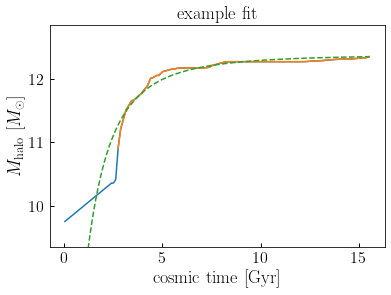

In [210]:
from diffmah.individual_halo_assembly import _rolling_plaw_vs_logt
from bacco_fitter import get_bacco_loss_data

tpred = np.linspace(0.1, tarr[-1], 1000)
lgtpred = np.log10(tpred)

itest = np.random.randint(0, log_mahs.shape[0])
# itest = 446
# itest = 1841
# itest = 1151
# itest = 4949
# itest = 2605
# itest = 2052
lgmah = log_mahs[itest, :]
p_init, loss_data = get_bacco_loss_data(tarr, lgmah, lgm_min)
logt_target, log_mah_target, logt0, u_k = loss_data

logmp_fit, logtc, early_index, late_index = [fit_data[key][itest] for key in DIFFMAH_FIT_KEYS]
log_mah_pred = _rolling_plaw_vs_logt(lgtpred, logt0, logmp_fit, logtc, FIXED_K, early_index, late_index)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(lgmah[-1]-3, lgmah[-1]+0.5)
__=ax.plot(tarr, lgmah, label=r'${\rm entire\ MAH}$')
__=ax.plot(10**logt_target, log_mah_target, label=r'${\rm target\ data}$')
__=ax.plot(tpred, log_mah_pred, '--', label=r'${\rm Diffmah}$')

title = ax.set_title(r'${\rm example\ fit}$')
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$M_{\rm halo}\ [M_{\odot}]$')
# leg = ax.legend()


In [160]:
early_index, late_index

(-1.0, -1.0)